# Lab 6.01 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


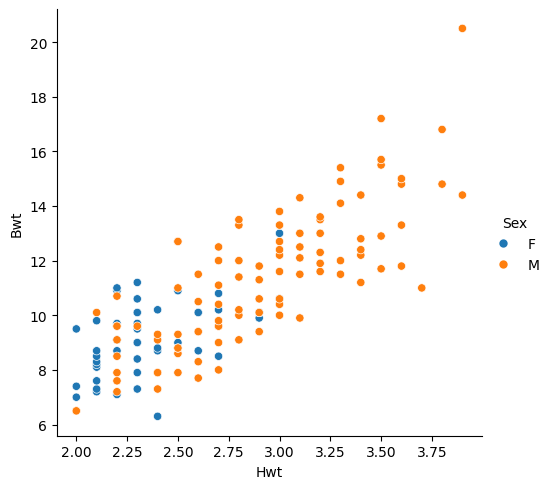

In [4]:
sns.relplot(data=cats,  x='Hwt', y='Bwt', hue='Sex');

3. Calculate and draw the regression line.


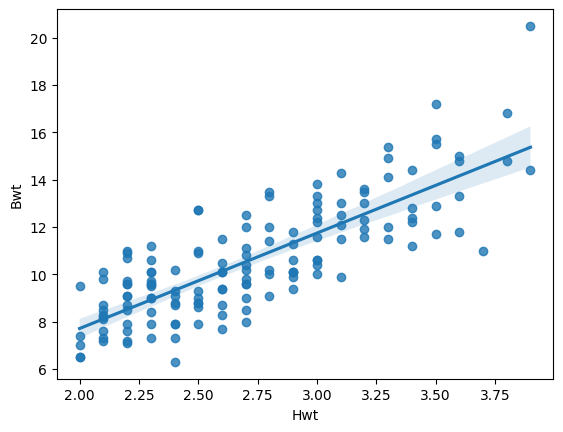

In [6]:
sns.regplot(data=cats, x='Hwt', y='Bwt');

In [7]:
# y = ax + b
x = cats.Hwt
y = cats.Bwt
a, b = np.polyfit(x, y, 1)

print(f"Regression line: y = {a} * x + {b}")

Regression line: y = 4.031757486783179 * x + -0.3510783771969617


4. Calculate the correlation coefficient and the coefficient of determination.

In [10]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    cats.Hwt,
    cats.Bwt)[0][1]
print(f"R ≈ {cor:.4f}")

print(f"R² ≈ {cor**2:.4f}")

R ≈ 0.8041
R² ≈ 0.6466


5. Interpret the results from the previous steps.

In [ ]:
# R > 0, stijgend verband
# |R| ligt dicht bij 1, sterk verband

# 64% van de variantie van de afhankelijke veranderlijke wordt verkaard door de onafhankelijke veranderlijke

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [11]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


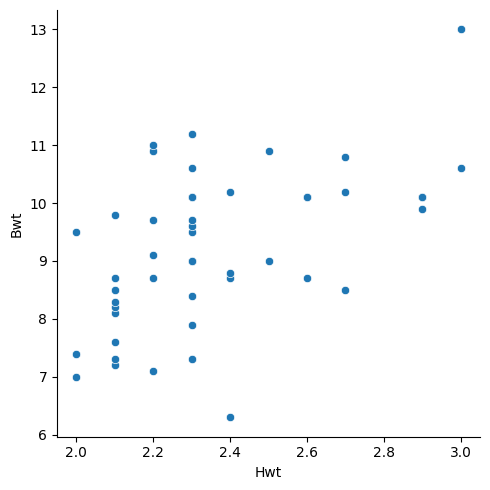

In [17]:
sns.relplot(data=cats[cats.Sex == 'F'],  x='Hwt', y='Bwt');

3. Calculate and draw the regression line.


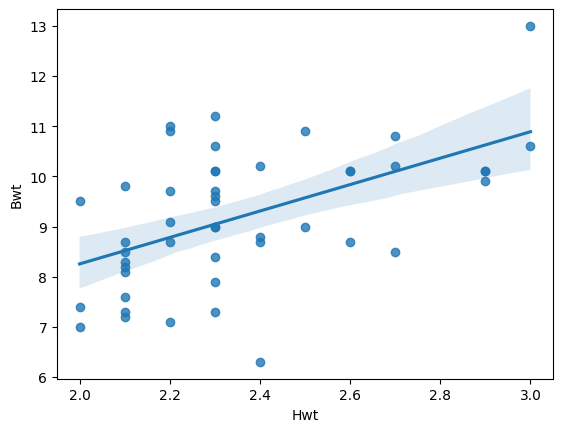

In [18]:
sns.regplot(data=cats[cats.Sex == 'F'], x='Hwt', y='Bwt');

In [19]:
# y = ax + b
x = cats[cats.Sex == 'F']['Hwt']
y = cats[cats.Sex == 'F']['Bwt']
a, b = np.polyfit(x, y, 1)

print(f"Regression line: y = {a} * x + {b}")

Regression line: y = 2.6364140480591503 * x + 2.981312384473199


4. Calculate the correlation coefficient and the coefficient of determination.


In [20]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    cats[cats.Sex == 'F']['Hwt'],
    cats[cats.Sex == 'F']['Bwt'])[0][1]
print(f"R ≈ {cor:.4f}")

print(f"R² ≈ {cor**2:.4f}")

R ≈ 0.5320
R² ≈ 0.2831


5. Interpret the results from the previous steps.

In [ ]:
# R > 0, stijgend verband
# |R| ligt op de helft, gemiddeld verband

# 28% van de variantie van de afhankelijke veranderlijke wordt verkaard door de onafhankelijke veranderlijke

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
